# Intro to Neural Networks
https://realpython.com/python-ai-neural-network/

In [4]:
input_vector = [1.72, 1.23]
weights_1 = [1.26, 0]
weights_2 = [2.17, 0.32]

In [5]:
# Computing the dot product of input_vector and weights_1
first_indexes_mult = input_vector[0] * weights_1[0]
second_indexes_mult = input_vector[1] * weights_1[1]
dot_product_1 = first_indexes_mult + second_indexes_mult
    
print(f"The dot product is: {dot_product_1}")

The dot product is: 2.1672


In [6]:
import numpy as np
dot_product_1 = np.dot(input_vector, weights_1)
print(f"The dot product is: {dot_product_1}")

The dot product is: 2.1672


In [13]:
dot_product_2 = np.dot(input_vector, weights_2)
print(f"The dot product is: {dot_product_2}")

The dot product is: 4.1259999999999994


## Results of Example
Each time the multiplication result is 0: smaller result -> vectors are less similar
Greater num = more similar
This example shows that the input vector is more similar to weights_2 (since 4.12 > 2.16)

## Classification Problem
- want to map input vectors to either 1 or 0
- dot product and sum are linear operators
- activation function are non-linear: ex sigmoid that maps to range 0-1
- if output is > 0.5, say the prediction is 1, and 0 for < .5

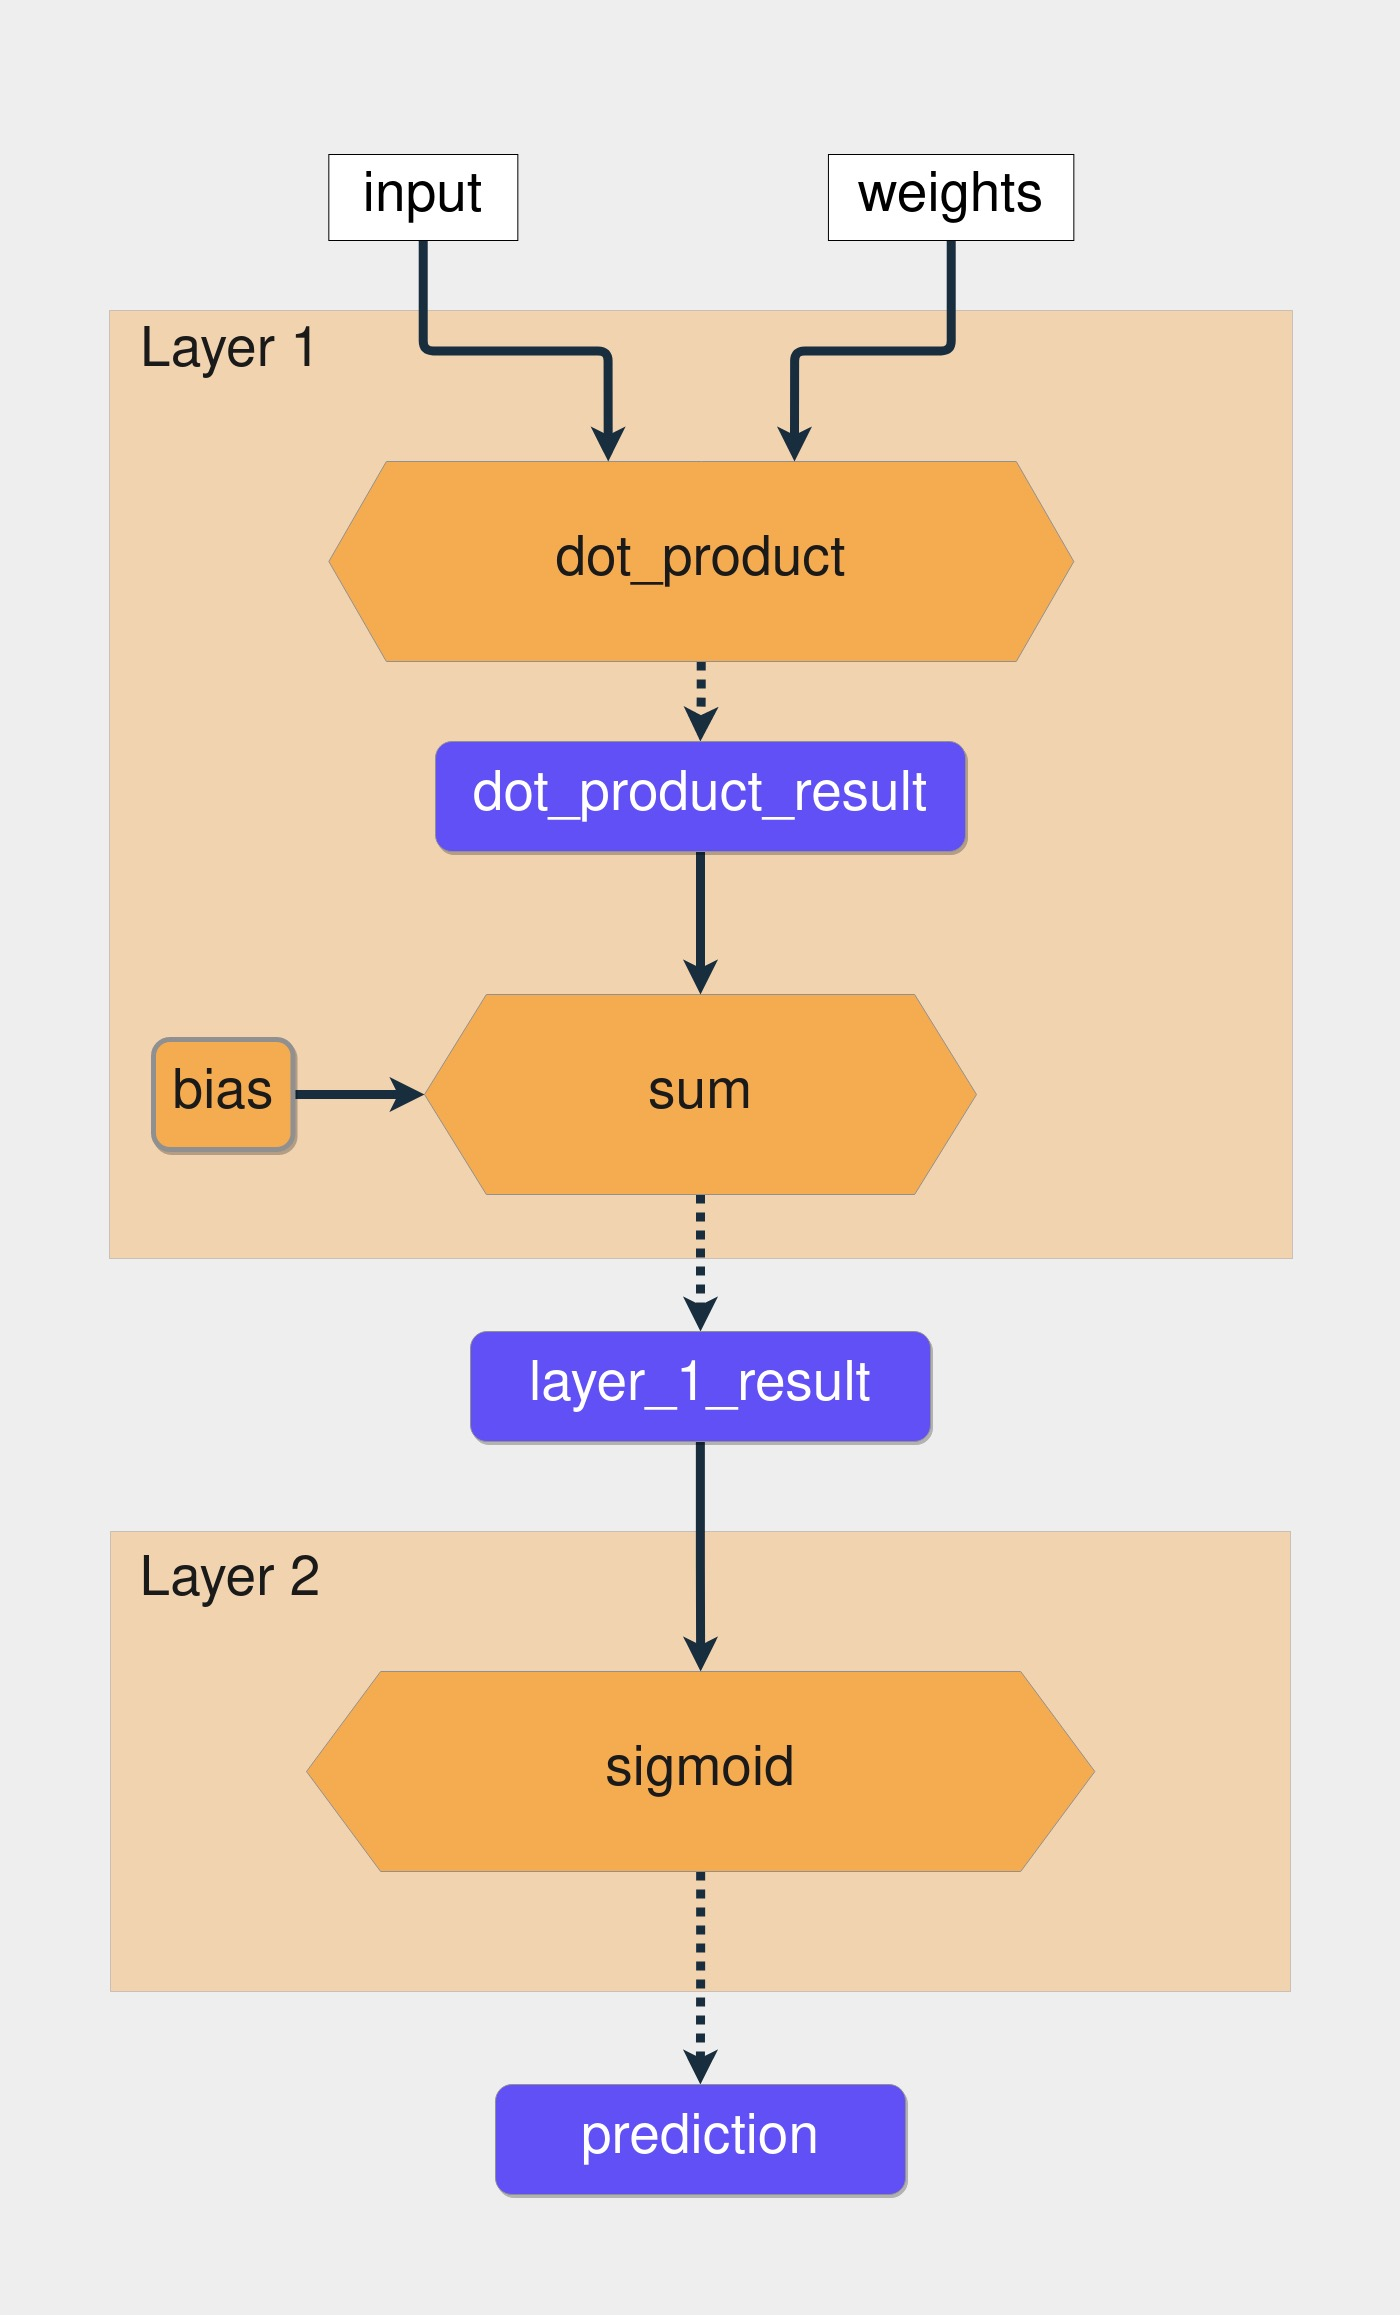

In [24]:
from IPython.display import Image
from IPython.core.display import HTML 
PATH = "/Users/nickmorrison/Desktop/"
Image(filename = PATH + "network_architecture copy.jpg", width=300, height=300)

In [25]:
# Wrapping the vectors in NumPy arrays
input_vector = np.array([1.66, 1.56])
weights_1 = np.array([1.45, -0.66])
bias = np.array([0.0])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def make_prediction(input_vector, weights, bias):
     layer_1 = np.dot(input_vector, weights) + bias
     layer_2 = sigmoid(layer_1)
     return layer_2

prediction = make_prediction(input_vector, weights_1, bias)

print(f"The prediction result is: {prediction}")

The prediction result is: [0.7985731]


The raw prediction result is 0.79, which is higher than 0.5, so the output is 1. The network made a correct prediction.

In [26]:
# Changing the value of input_vector
input_vector = np.array([2, 1.5])

prediction = make_prediction(input_vector, weights_1, bias)

print(f"The prediction result is: {prediction}")

The prediction result is: [0.87101915]


^This is wrong, should predict 0 but the result is > .5

Next step is to train: asses error then adjust weights using gradient descent/backpropagation

## Measure the error: Cost Function
- were using MSE (Mean Sqaured Error) as cost function
- compute the difference then square result(always positive)
- bigger errors have larger impact, smaller errors get smaller

In [27]:
target = 0

mse = np.square(prediction - target)

print(f"Prediction: {prediction}; Error: {mse}")

Prediction: [0.87101915]; Error: [0.75867436]


## How to reduce error?
- consider a quadratic function
- use derivative to decide which direction to go to get towards zero -> gradient descent
- derivative of np.square(x) is 2 * x, and the derivative of x is 1.

In [28]:
derivative = 2 * (prediction - target)

print(f"The derivative is {derivative}")

The derivative is [1.7420383]


^ positive number -> need to decrease

In [30]:
# Updating the weights
weights_1 = weights_1 - derivative
print(weights_1)

prediction = make_prediction(input_vector, weights_1, bias)

error = (prediction - target) ** 2

print(f"Prediction: {prediction}; Error: {error}")

[-2.03407659 -4.14407659]
Prediction: [3.41652253e-05]; Error: [1.16726262e-09]


also use __learning rate__ (alpha parameter) to adjust increment
If your neural network makes a correct prediction for every instance in your training set, then you probably have an overfitted model -> fix with stochastic gradient descent

also need to update bias vector

## Applying the Chain Rule
- need to update both the weights and the bias vector (independent vars)
- we also have function composition across the layers -> to take the derivative of the error concerning the parameters, you’ll need to use the chain rule from calculus
- partial derivatives of each function, evaluate them, and multiply all the partial derivatives to get the derivative you want
- backward pass: in each backward pass, you compute the partial derivatives of each function, substitute the variables by their values, and finally multiply everything
- this algorithm to update the neural network parameters is called backpropagation

In [31]:
def sigmoid_deriv(x):
    return sigmoid(x) * (1-sigmoid(x))

derror_dprediction = 2 * (prediction - target)
layer_1 = np.dot(input_vector, weights_1) + bias
dprediction_dlayer1 = sigmoid_deriv(layer_1)
dlayer1_dbias = 1

derror_dbias = (
    derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
)

- to update the weights, you follow the same process, going backward and taking the partial derivatives until you get to the weights variable
- since you’ve already computed some of the partial derivatives, you’ll just need to compute dlayer1_dweights

## Neural Network Class
-  generates random start values for the weights and bias

In [39]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )
        
    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target
            )

            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors

In [38]:
learning_rate = 0.1

neural_network = NeuralNetwork(learning_rate)

neural_network.predict(input_vector)

0.9871697451908659

^ this makes a prediction for one instance, not a dataset
next we want our model to work on unseen data

## Training Network with more Data

Stochastic gradient descent is a technique in which, at every iteration, the model makes a prediction based on a randomly selected piece of training data, calculates the error, and updates the parameters
- so we add train() method

- In short, you pick a random instance from the dataset, compute the gradients, and update the weights and the bias. You also compute the cumulative error every 100 iterations and save those results in an array. You’ll plot this array to visualize how the error changes during the training process.

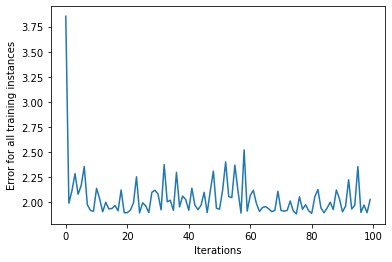

In [2]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )
        
    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target
            )

            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors

import numpy as np
import matplotlib.pyplot as plt

input_vectors = np.array(
    [
        [3, 1.5],
        [2, 1],
        [4, 1.5],
        [3, 4],
        [3.5, 0.5],
        [2, 0.5],
        [5.5, 1],
        [1, 1],
    ]
)

targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])

learning_rate = 0.1

neural_network = NeuralNetwork(learning_rate)

training_error = neural_network.train(input_vectors, targets, 10000)

plt.plot(training_error)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.savefig("cumulative_error.png")

- This is the graph showing the error for an instance of a neural network
- The overall error is decreasing, which is what you want
- usually have way more layers, more complex data
- That’s one of the reasons why deep learning frameworks like Keras, PyTorch, and TensorFlow are so popular